In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "lines.linewidth":2,
                 "legend.frameon":False,
                 "legend.labelspacing":0,
                 "legend.borderpad":0.5}

sns.set_theme(style='ticks', rc=custom_params)

In [2]:
#plt.rcParams.keys()

In [3]:
def Import_Xsecs(directory):
    # Get list of file names in the directory
    file_names = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), skiprows=2, names=['Energy / nm', 'Cross section / cm^2'])
    return imports


In [4]:
imports_experimental = Import_Xsecs('Data/Xsecs/Experimental')

In [5]:
Experimental_Cheng_1999['Cross section / cm^2'] = Experimental_Cheng_1999['Cross section / cm^2']*1e18
Experimental_Mota_2005['Energy / nm'] = 1240/Experimental_Mota_2005['Energy / nm']
Experimental_Chung_2001_250K['Cross section / cm^2'] = Experimental_Chung_2001_250K['Cross section / cm^2']/10
Experimental_Chung_2001_295K['Cross section / cm^2'] = Experimental_Chung_2001_295K['Cross section / cm^2']/10


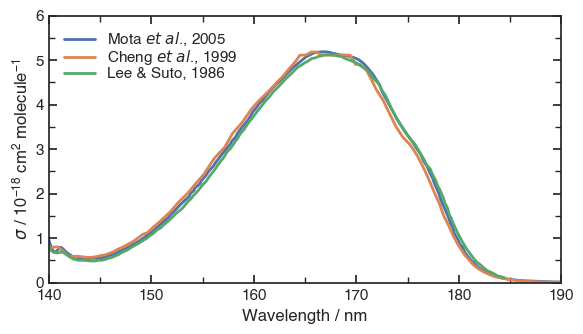

In [6]:
fig, ax = plt.subplots(figsize=(6, 3.5))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax)
sns.lineplot(data=Experimental_Cheng_1999, x='Energy / nm', y='Cross section / cm^2', label='Cheng $\it{et}$ $\it{al}$., 1999', ax=ax)
sns.lineplot(data=Experimental_Lee_Suto_1986, x='Energy / nm', y='Cross section / cm^2', label='Lee & Suto, 1986', ax=ax)

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 6)
ax.legend()

plt.tight_layout()
plt.savefig('Plots/Experimental_XSecs.png', dpi=200)

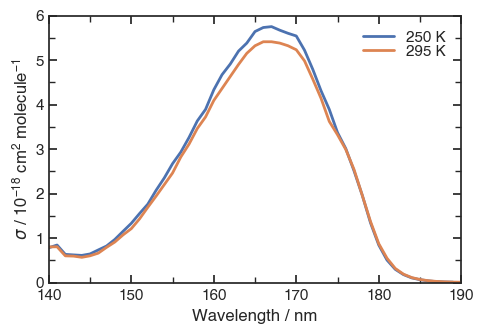

In [7]:
fig, ax = plt.subplots(figsize=(5, 3.5))
sns.lineplot(data=Experimental_Chung_2001_250K, x='Energy / nm', y='Cross section / cm^2', label='250 K', ax=ax)
sns.lineplot(data=Experimental_Chung_2001_295K, x='Energy / nm', y='Cross section / cm^2', label='295 K', ax=ax)

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 6)
ax.legend()

plt.tight_layout()
plt.savefig('Plots/Experimental_TempDep_XSecs.png', dpi=200)

In [8]:
imports_theoretical = Import_Xsecs('Data/Xsecs')
print(imports_theoretical)

['EOM_CCSD__aug_cc_pVDZ', 'EOM_CCSD__aug_cc_pVTZ', 'pigle4_1000k_qtip4p_ccsd_VDZ', 'pigle4_300k_qtip4p_ccsd_VDZ', 'qtip4pf_optimized_single_point']


In [9]:
EOM_CCSD__aug_cc_pVDZ['Cross section / cm^2'] = EOM_CCSD__aug_cc_pVDZ['Cross section / cm^2']*1e18
EOM_CCSD__aug_cc_pVTZ['Cross section / cm^2'] = EOM_CCSD__aug_cc_pVTZ['Cross section / cm^2']*1e18
pigle4_300k_qtip4p_ccsd_VDZ['Cross section / cm^2'] = pigle4_300k_qtip4p_ccsd_VDZ['Cross section / cm^2']*1e18
pigle4_1000k_qtip4p_ccsd_VDZ['Cross section / cm^2'] = pigle4_1000k_qtip4p_ccsd_VDZ['Cross section / cm^2']*1e18
qtip4pf_optimized_single_point['Cross section / cm^2'] = qtip4pf_optimized_single_point['Cross section / cm^2']*1e18

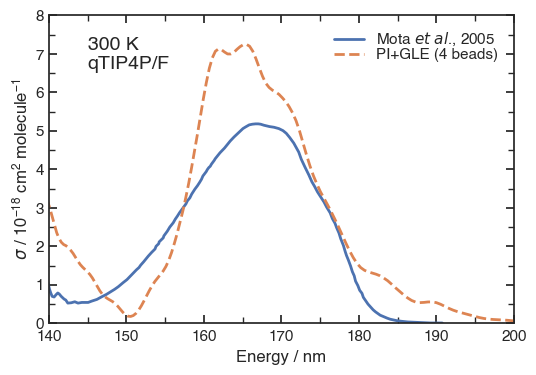

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(data=Experimental_Mota_2005, 
             x='Energy / nm', 
             y='Cross section / cm^2', 
             label='Mota $\it{et}$ $\it{al}$., 2005',
             ax=ax)
sns.lineplot(data=pigle4_300k_qtip4p_ccsd_VDZ, 
             x='Energy / nm', 
             y='Cross section / cm^2', 
             label='PI+GLE (4 beads)', 
             linestyle='--',
             ax=ax)

ax.set_ylim(0,8)
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.text(145, 6.5, '300 K\nqTIP4P/F', ha='left', va='bottom', fontsize=14)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.legend(loc='upper right')

plt.savefig('Plots/Theoretical_XSecs.png', dpi=200)

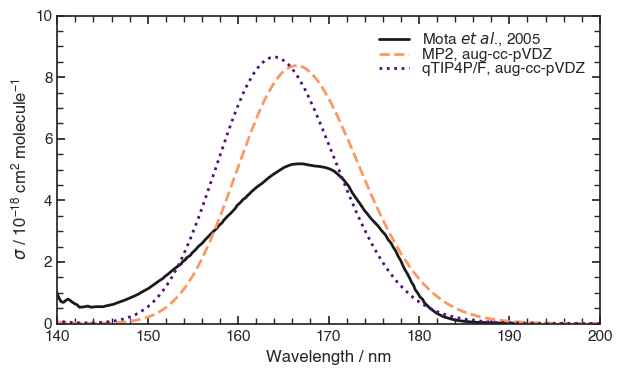

In [11]:
fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, c='k')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle='--', ax=ax, c='#fc9861')
#sns.lineplot(data=EOM_CCSD__aug_cc_pVTZ, x='Energy / nm', y='Cross section / cm^2', label='EOM-CCSD, aug-cc-pVTZ', linestyle='-.', ax=ax, c='#b73779')
sns.lineplot(data=qtip4pf_optimized_single_point, x='Energy / nm', y='Cross section / cm^2', label='qTIP4P/F, aug-cc-pVDZ', linestyle=':', ax=ax, c='#51127c')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.legend(loc='best')

plt.savefig('Plots/SinglePoint_XSecs.png', dpi=200)
#mp2

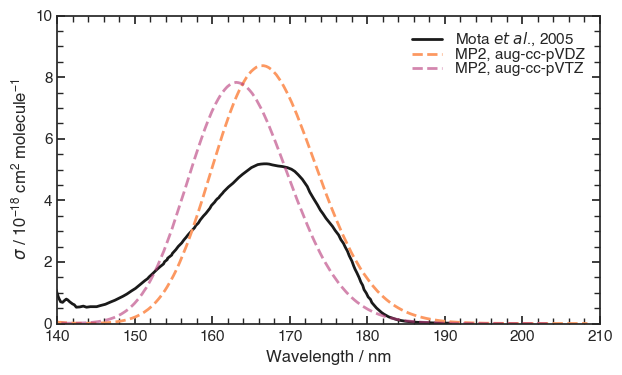

In [12]:
fig, ax = plt.subplots(figsize=(7, 4))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, c='k')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle='--', ax=ax, c='#fc9861')
sns.lineplot(data=EOM_CCSD__aug_cc_pVTZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVTZ', linestyle='--', ax=ax, c='#b73779', alpha=0.6)

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,210)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.legend(loc='best')

plt.savefig('Plots/SinglePoint_XSecs_Appendix.png', dpi=200)

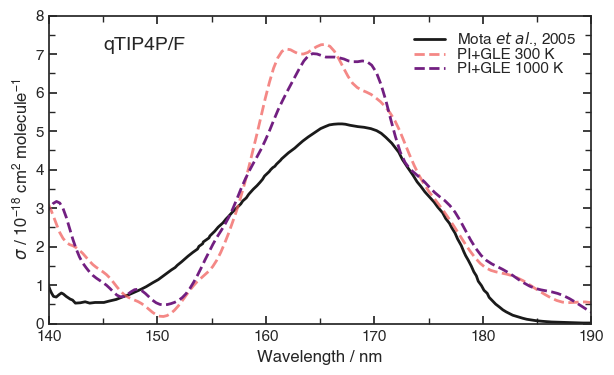

In [14]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', c='k', ax=ax)
sns.lineplot(data=pigle4_300k_qtip4p_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='PI+GLE 300 K', linestyle='--', c='#f1605d', alpha=0.75, ax=ax)
sns.lineplot(data=pigle4_1000k_qtip4p_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='PI+GLE 1000 K', linestyle='--', c='#721f81', ax=ax)
ax.text(145, 7, 'qTIP4P/F', ha='left', va='bottom', fontsize=14)

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,190)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.savefig('Plots/PIGLE4_1000Geom_XSecs.png', dpi=200)
#contrast
#thicker

### Presentation Plots

In [32]:
custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":16.0,
                 "lines.linewidth":2,
                 "legend.frameon":False,
                 "legend.labelspacing":0}

sns.set_theme(style='ticks', rc=custom_params)

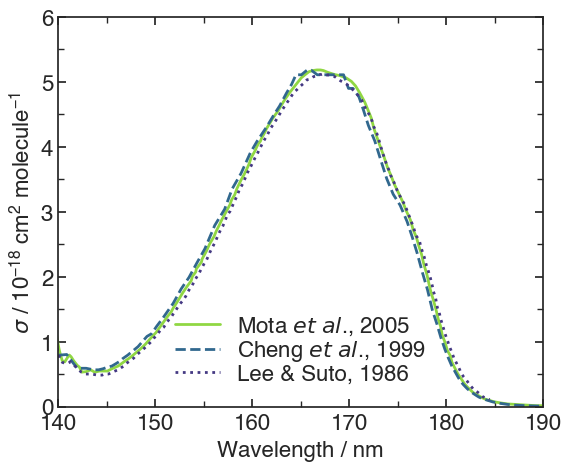

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, color='#90d743')
sns.lineplot(data=Experimental_Cheng_1999, x='Energy / nm', y='Cross section / cm^2', label='Cheng $\it{et}$ $\it{al}$., 1999', ax=ax, color='#31688e', linestyle='--')
sns.lineplot(data=Experimental_Lee_Suto_1986, x='Energy / nm', y='Cross section / cm^2', label='Lee & Suto, 1986', ax=ax, color='#443983', linestyle=':')

ax.set_xlabel('Wavelength / nm', fontsize=16)
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$', fontsize=16)
ax.set_ylim(0, 6)
ax.legend(fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.savefig('Plots/Presentation/Experimental_XSecs.png', dpi=200)

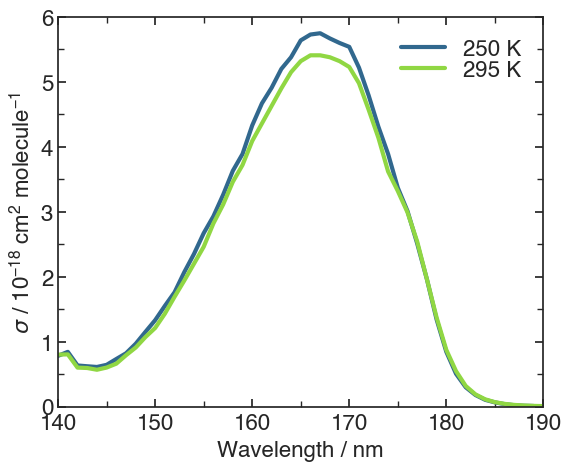

In [34]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(data=Experimental_Chung_2001_250K, x='Energy / nm', y='Cross section / cm^2', label='250 K', ax=ax, linewidth=3, color='#31688e')
sns.lineplot(data=Experimental_Chung_2001_295K, x='Energy / nm', y='Cross section / cm^2', label='295 K', ax=ax, linewidth=3, color='#90d743')

ax.set_xlabel('Wavelength / nm', fontsize=16)
ax.set_xlim(140,190)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$', fontsize=16)
ax.set_ylim(0, 6)
ax.legend(fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.tight_layout()
plt.savefig('Plots/Presentation/Experimental_TempDep_XSecs.png', dpi=200)

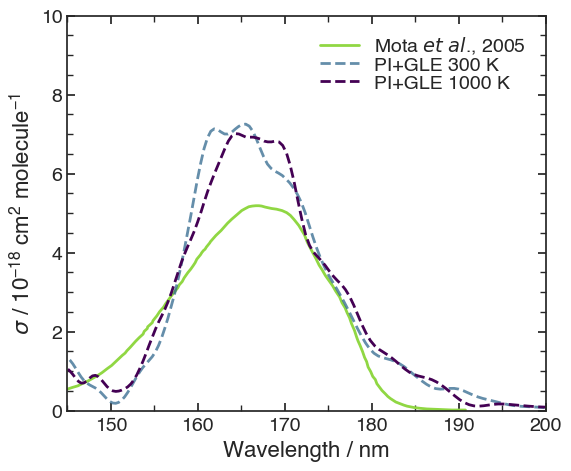

In [35]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', color='#90d743', ax=ax)
sns.lineplot(data=pigle4_300k_qtip4p_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='PI+GLE 300 K', linestyle='--', c='#31688e', alpha=0.75, ax=ax)
sns.lineplot(data=pigle4_1000k_qtip4p_ccsd_VDZ, x='Energy / nm', y='Cross section / cm^2', label='PI+GLE 1000 K', linestyle='--', c='#440154', ax=ax)
#ax.text(145, 7, 'Nuclear Ensemble', ha='left', va='bottom', fontsize=20)

ax.set_xlabel('Wavelength / nm', fontsize=16)
ax.set_xlim(145,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$', fontsize=16)
ax.set_ylim(0, 10)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.legend(loc='best', fontsize=14)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.savefig('Plots/Presentation/PIGLE4_1000Geom_XSecs_PRESENTATION.png', dpi=200)

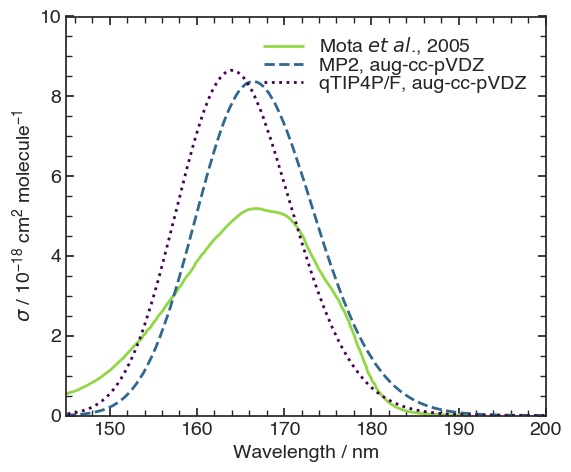

In [36]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, color='#90d743')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle='--', ax=ax, c='#31688e')
sns.lineplot(data=qtip4pf_optimized_single_point, x='Energy / nm', y='Cross section / cm^2', label='qTIP4P/F, aug-cc-pVDZ', linestyle=':', ax=ax, c='#440154')

ax.set_xlabel('Wavelength / nm', fontsize=14)
ax.set_xlim(145,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$', fontsize=14)
ax.set_ylim(0, 10)
ax.legend(loc='best', fontsize=14)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig('Plots/Presentation/SinglePoint_XSecs.png', dpi=200)

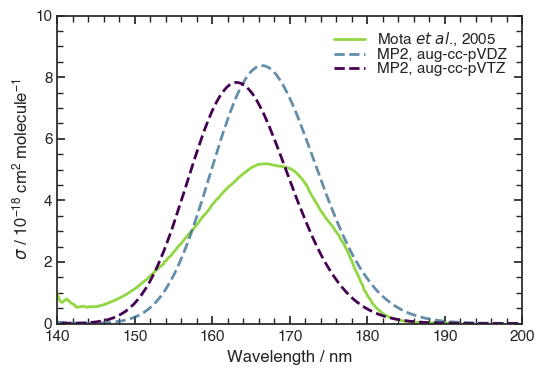

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(data=Experimental_Mota_2005, x='Energy / nm', y='Cross section / cm^2', label='Mota $\it{et}$ $\it{al}$., 2005', ax=ax, c='#90d743')
sns.lineplot(data=EOM_CCSD__aug_cc_pVDZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVDZ', linestyle='--', ax=ax, c='#31688e', alpha=0.75)
sns.lineplot(data=EOM_CCSD__aug_cc_pVTZ, x='Energy / nm', y='Cross section / cm^2', label='MP2, aug-cc-pVTZ', linestyle='--', ax=ax, c='#440154')

ax.set_xlabel('Wavelength / nm')
ax.set_xlim(140,200)
ax.set_ylabel(r'$\sigma$ / 10$\mathregular{^{-18}}$ cm$\mathregular{^{2}}$ molecule$\mathregular{^{-1}}$')
ax.set_ylim(0, 10)
ax.legend(loc='best')

plt.savefig('Plots/Presentation/SinglePoint_XSecs_BasisSet.png', dpi=200)